In [7]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from numpy.random import choice

import warnings
warnings.filterwarnings("ignore")

In [8]:
orders = pd.read_csv('instacart-market-basket-analysis/orders.csv/orders.csv')
products = pd.read_csv('instacart-market-basket-analysis/products.csv/products.csv')
order_products = pd.read_csv('instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv')
order_products_prior = pd.read_csv('instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv')
aisles = pd.read_csv('instacart-market-basket-analysis/aisles.csv/aisles.csv')
departments = pd.read_csv('instacart-market-basket-analysis/departments.csv/departments.csv')
sample = pd.read_csv('instacart-market-basket-analysis/sample_submission.csv/sample_submission.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


In [5]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083.00,3421083.00,3421083.00,3421083.00,3421083.00,3214874.00
mean,1710542.00,102978.21,17.15,2.78,13.45,11.11
std,987581.74,59533.72,17.73,2.05,4.23,9.21
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,855271.50,51394.00,5.00,1.00,10.00,4.00
50%,1710542.00,102689.00,11.00,3.00,13.00,7.00
75%,2565812.50,154385.00,23.00,5.00,16.00,15.00
max,3421083.00,206209.00,100.00,6.00,23.00,30.00


In [6]:
orders['user_id'].value_counts()

53684     100
201623    100
50817     100
176951    100
88911     100
         ... 
24224       4
199509      4
32420       4
21310       4
196830      4
Name: user_id, Length: 206209, dtype: int64

In [7]:
orders.groupby('user_id')['order_id'].count().describe()

count   206209.00
mean        16.59
std         16.65
min          4.00
25%          6.00
50%         10.00
75%         20.00
max        100.00
Name: order_id, dtype: float64

In [8]:
orders['days_since_prior_order'].isna().sum()

206209

In [9]:
orders[orders['user_id'] == 2].value_counts()

order_id  user_id  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior_order
3268552   2        prior     13            4          11                 30.00                     1
3194192   2        prior     7             2          12                 14.00                     1
3186735   2        prior     12            1          9                  28.00                     1
1901567   2        prior     3             1          10                 3.00                      1
1718559   2        prior     9             2          9                  8.00                      1
1673511   2        prior     5             3          11                 8.00                      1
1501582   2        prior     2             5          10                 10.00                     1
1492625   2        train     15            1          11                 30.00                     1
1447487   2        prior     10            1          11                 6.00                   

[]

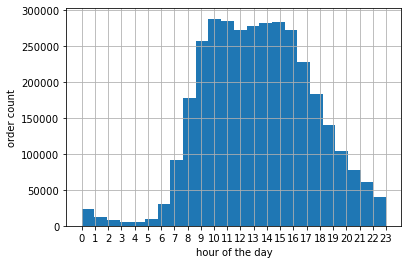

In [10]:
ax = orders['order_hour_of_day'].hist(bins=24)
ax.set_xticks(range(0,24))
# orders['order_hour_of_day'].value_counts().plot(kind="bar")
ax.set_xlabel("hour of the day")
ax.set_ylabel("order count")
ax.plot()

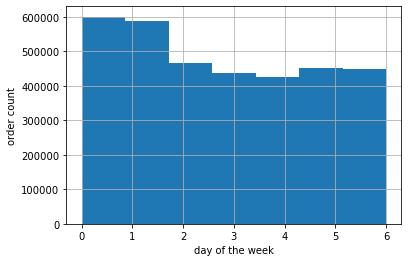

In [11]:
ax = orders['order_dow'].hist(bins=7)
ax.set_xlabel("day of the week")
ax.set_ylabel("order count")
ax.set_xticks(range(0,7))
# orders['order_hour_of_day'].value_counts().plot(kind="bar")

[]

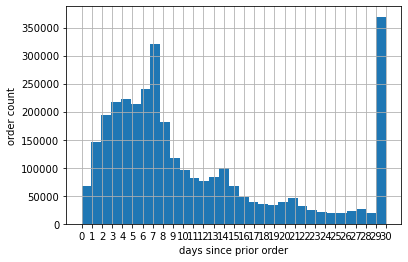

In [12]:
ax = orders['days_since_prior_order'].hist(bins=31)
ax.set_xlabel("days since prior order")
ax.set_ylabel("order count")
ax.set_xticks(range(0,31))
ax.plot()

[]

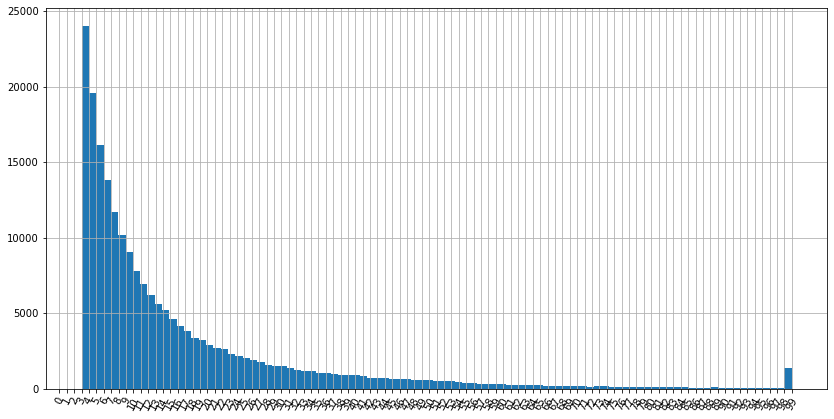

In [13]:
ax = orders[orders['eval_set'] == "prior"].groupby('user_id')['eval_set'].count().hist(bins=97, figsize=(14, 7))
ax.set_xticks(range(0,100))
ax.set_xticklabels(range(0,100), rotation=60)
ax.plot()

In [14]:
orders[orders['eval_set'] == "prior"].groupby('user_id')['eval_set'].count().value_counts().sort_index()

3     23986
4     19590
5     16165
6     13850
7     11700
      ...  
95       67
96       54
97       50
98       47
99     1374
Name: eval_set, Length: 97, dtype: int64

Text(0, 0.5, 'customer count')

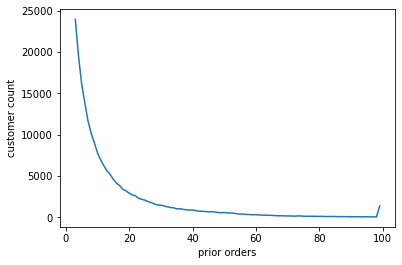

In [15]:
ax = orders[orders['eval_set'] == "prior"].groupby('user_id')['eval_set'].count().value_counts().sort_index().plot()
ax.set_xlabel("prior orders")
ax.set_ylabel("customer count")

In [16]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1384617.00,1384617.00,1384617.00,1384617.00
mean,1706297.62,25556.24,8.76,0.60
std,989732.65,14121.27,7.42,0.49
min,1.00,1.00,1.00,0.00
25%,843370.00,13380.00,3.00,0.00
50%,1701880.00,25298.00,7.00,1.00
75%,2568023.00,37940.00,12.00,1.00
max,3421070.00,49688.00,80.00,1.00


In [17]:
order_products['product_id'].value_counts()

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
44256        1
2764         1
4815         1
43736        1
46835        1
Name: product_id, Length: 39123, dtype: int64

In [18]:
products.describe()

,product_id,aisle_id,department_id
count,49688.00,49688.00,49688.00
mean,24844.50,67.77,11.73
std,14343.83,38.32,5.85
min,1.00,1.00,1.00
25%,12422.75,35.00,7.00
50%,24844.50,69.00,13.00
75%,37266.25,100.00,17.00
max,49688.00,134.00,21.00


In [19]:
products["product_id"].count()

49688

In [20]:
order_products.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [21]:
order_products_prior.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [22]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [23]:
orders.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00
5,3367565,1,prior,6,2,7,19.00
6,550135,1,prior,7,1,9,20.00
7,3108588,1,prior,8,1,14,14.00
8,2295261,1,prior,9,1,16,0.00
9,2550362,1,prior,10,4,8,30.00


In [24]:
orders[orders['order_id'] == 34]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
584613,34,35220,test,20,3,11,8.00


In [25]:
order_products[order_products['order_id'] == 329954]

,order_id,product_id,add_to_cart_order,reordered


In [26]:
order_products_prior[order_products_prior['order_id'] == 329954]

,order_id,product_id,add_to_cart_order,reordered


In [27]:
sample.shape #test

(75000, 2)

In [28]:
order_products_prior.shape #prior

(32434489, 4)

In [29]:
order_products.shape #train

(1384617, 4)

In [30]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [31]:
sample.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [32]:
order_products.head(30)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [33]:
products.describe()

,product_id,aisle_id,department_id
count,49688.00,49688.00,49688.00
mean,24844.50,67.77,11.73
std,14343.83,38.32,5.85
min,1.00,1.00,1.00
25%,12422.75,35.00,7.00
50%,24844.50,69.00,13.00
75%,37266.25,100.00,17.00
max,49688.00,134.00,21.00


In [34]:
aisles.describe()

,aisle_id
count,134.00
mean,67.50
std,38.83
min,1.00
25%,34.25
50%,67.50
75%,100.75
max,134.00


In [35]:
departments.describe()

,department_id
count,21.00
mean,11.00
std,6.20
min,1.00
25%,6.00
50%,11.00
75%,16.00
max,21.00


[]

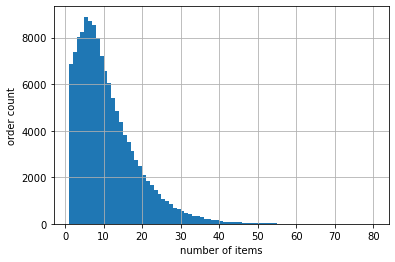

In [36]:
ax = order_products.groupby('order_id')['product_id'].count().hist(bins=79)
# ax.set_xticks(range(0,79))
ax.set_xlabel("number of items")
ax.set_ylabel("order count")
ax.plot()

In [37]:
order_products.groupby('order_id')['product_id'].count().max()

80

In [38]:
order_products.groupby('order_id')['product_id'].count().mean()

10.552759338155157

[]

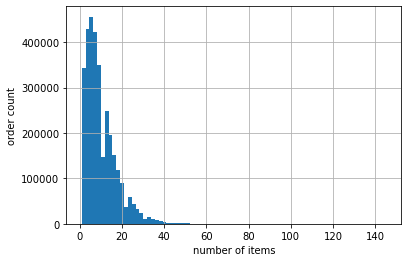

In [39]:
ax = order_products_prior.groupby('order_id')['product_id'].count().hist(bins=79)
# ax.set_xticks(range(0,79))
ax.set_xlabel("number of items")
ax.set_ylabel("order count")
ax.plot()

In [40]:
order_products_prior.groupby('order_id')['product_id'].count().mean()

10.088883421247614

In [41]:
order_products_total = pd.concat([order_products_prior,order_products])

In [42]:
order_products_total.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [43]:
order_products_total.shape

(33819106, 4)

In [44]:
order_products_prior.shape

(32434489, 4)

In [45]:
order_products.shape

(1384617, 4)

In [46]:
32434489 + 1384617

33819106

In [47]:
order_products_join = pd.merge(left=order_products_total, right=products, how='left', left_on='product_id', right_on='product_id')

In [48]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [49]:
order_products_join = pd.merge(left=order_products_join, right=aisles, how='left', left_on='aisle_id', right_on='aisle_id')

In [50]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [51]:
order_products_join = pd.merge(left=order_products_join, right=departments, how='left', left_on='department_id', right_on='department_id')

In [52]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [53]:
order_products_join.shape

(33819106, 9)

In [54]:
top_products = order_products_join.groupby(['product_name','product_id','department','aisle']).count().sort_values('order_id', ascending=False)
top_products

,,,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_name,product_id,department,aisle,,,,,
Banana,24852,produce,fresh fruits,491291,491291,491291,491291,491291
Bag of Organic Bananas,13176,produce,fresh fruits,394930,394930,394930,394930,394930
Organic Strawberries,21137,produce,fresh fruits,275577,275577,275577,275577,275577
Organic Baby Spinach,21903,produce,packaged vegetables fruits,251705,251705,251705,251705,251705
Organic Hass Avocado,47209,produce,fresh fruits,220877,220877,220877,220877,220877
...,...,...,...,...,...,...,...,...
Greek Blended Cherry Fat Free Yogurt,1908,dairy eggs,yogurt,1,1,1,1,1
All Natural Stevia Liquid Extract Sweetener,1002,pantry,baking ingredients,1,1,1,1,1
"Frittata, Farmer's Market",14756,frozen,frozen appetizers sides,1,1,1,1,1


In [55]:
top_25 = top_products.reset_index()[['product_id', 'product_name']].iloc[:25]

In [56]:
# top_products.to_excel('Top_products.xlsx')

[]

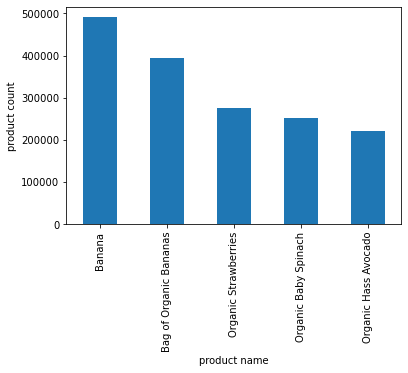

In [57]:
ax = top_products.droplevel(['product_id','department','aisle'])['order_id'].iloc[:5].plot(kind='bar')
ax.set_xlabel("product name")
ax.set_ylabel("product count")
ax.plot()

In [58]:
# top_aisles = order_products_join.groupby(['aisle','aisle_id']).count().sort_values('order_id', ascending=False)

In [59]:
# ax = top_aisles.droplevel(['aisle_id'])['order_id'].iloc[:5].plot(kind='bar')
# ax.set_xlabel("aisle name")
# ax.set_ylabel("aisle count")
# ax.plot()

In [60]:
# top_aisles.to_excel('Top_aisles.xlsx')

In [61]:
# top_departments = order_products_join.groupby(['department','department_id']).count().sort_values('order_id', ascending=False)

In [62]:
# ax = top_departments.droplevel(['department_id'])['order_id'].iloc[:5].plot(kind='bar')
# ax.set_xlabel("department name")
# ax.set_ylabel("department count")
# ax.plot()

In [63]:
# top_departments.to_excel('Top_departments.xlsx')

In [64]:
 top_products_reorders = order_products_join[order_products_join['reordered'] == 1].groupby(['product_name','product_id','department','aisle']).count().sort_values('order_id', ascending=False)
# top_products_reorders

In [65]:
# top_products_reorders.to_excel('Top_products_reorders.xlsx')

In [66]:
top_products_reorders = top_products_reorders.reset_index()
top_products = top_products.reset_index()

In [67]:
top_products_reorders.shape

(45603, 9)

In [68]:
res = []
for i,r in tqdm(top_products_reorders.iterrows()):
        res.append({
            'product_id':r['product_id'],
            'probability': round(r['order_id']/float(top_products[top_products['product_id'] == r['product_id']]['order_id']),3)
        })

45603it [00:46, 980.73it/s] 


In [69]:
res_df1 = pd.DataFrame(res)
res_df1.head()

,product_id,probability
0,24852,0.84
1,13176,0.83
2,21137,0.78
3,21903,0.77
4,47209,0.80


In [70]:
res_df1 = res_df1.sort_values(by="probability", ascending = False)
res_df1

,product_id,probability
16572,6433,0.94
14826,2075,0.93
30162,43553,0.92
14002,27740,0.92
22172,14609,0.91
...,...,...
44783,9966,0.01
41300,24364,0.01
45398,20430,0.01
42738,10376,0.01


In [71]:
res_df1 = pd.merge(left=res_df1, right=order_products_join[['product_id', 'product_name','aisle','department']], how = 'left', left_on = 'product_id', right_on = 'product_id')

In [72]:
res_df1.shape

(33789838, 5)

In [73]:
res_df1 = res_df1.drop_duplicates()

In [74]:
# res_df1.to_excel('probability_reorders.xlsx')

In [75]:
order_products_join[order_products_join['product_id'] == 11672]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
311265,32825,11672,8,0,Ground Sage,104,13,spices seasonings,pantry
591637,62532,11672,6,0,Ground Sage,104,13,spices seasonings,pantry
617140,65253,11672,7,0,Ground Sage,104,13,spices seasonings,pantry
676916,71600,11672,7,0,Ground Sage,104,13,spices seasonings,pantry
725853,76809,11672,5,0,Ground Sage,104,13,spices seasonings,pantry
...,...,...,...,...,...,...,...,...,...
33356317,2275045,11672,18,0,Ground Sage,104,13,spices seasonings,pantry
33470876,2562044,11672,3,0,Ground Sage,104,13,spices seasonings,pantry
33581913,2834566,11672,8,0,Ground Sage,104,13,spices seasonings,pantry
33614209,2913723,11672,7,0,Ground Sage,104,13,spices seasonings,pantry


In [76]:
# top_product_reorders_prob = top_products_reorders['order_id']/(top_products_reorders['order_id'].sum())

In [77]:
# top_product_reorders_prob

In [78]:
# top_departments_reorders = order_products_join[order_products_join['reordered'] == 1].groupby(['department','department_id']).count().sort_values('order_id', ascending=False)

In [79]:
# top_departments_reorders.head()

In [80]:
# top_departments_reorders.to_excel('Top_departments_reorders.xlsx')

In [81]:
# top_aisles_reorders = order_products_join[order_products_join['reordered'] == 1].groupby(['aisle','aisle_id']).count().sort_values('order_id', ascending=False)

In [82]:
# top_aisles_reorders.head()

In [83]:
# top_aisles_reorders.to_excel('Top_aisles_reorders.xlsx')

In [84]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [85]:
order_products_join.shape

(33819106, 9)

In [86]:
order_products_join = pd.merge(left=order_products_join, right=orders, how='left', left_on='order_id', right_on='order_id')

In [87]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00


In [88]:
order_products_join.shape

(33819106, 15)

In [89]:
order_products_join[order_products_join['order_number'] == 1]['reordered'].unique()

array([0], dtype=int64)

In [90]:
# top_products_first = order_products_join[order_products_join['order_number'] == 1].groupby(['product_name','product_id','department','aisle']).count().sort_values('order_id', ascending=False)
# top_products_first

In [91]:
# top_products_first.to_excel('Top_products_first.xlsx')

In [92]:
# top_departments_first = order_products_join[order_products_join['order_number'] == 1].groupby(['department','department_id']).count().sort_values('order_id', ascending=False)

In [93]:
# top_departments_first.to_excel('Top_departments_first.xlsx')

In [94]:
# top_aisles_first = order_products_join[order_products_join['order_number'] == 1].groupby(['aisle','aisle_id']).count().sort_values('order_id', ascending=False)

In [95]:
# top_aisles_first.to_excel('Top_aisles_first.xlsx')

In [96]:
# top_products_second = order_products_join[order_products_join['order_number'] == 2].groupby(['product_name','product_id','department','aisle']).count().sort_values('order_id', ascending=False)
# top_products_second

In [97]:
# top_products_second.to_excel('Top_products_second.xlsx')

In [98]:
# top_products_third = order_products_join[order_products_join['order_number'] == 3].groupby(['product_name','product_id','department','aisle']).count().sort_values('order_id', ascending=False)
# top_products_third

In [99]:
# top_products_third.to_excel('Top_products_third.xlsx')

In [100]:
order_products_total.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [101]:
orders_quantity = order_products_total.groupby('order_id')['product_id'].count()
orders_quantity.to_frame()

,product_id
order_id,
1,8
2,9
3,8
4,13
5,26
...,...
3421079,1
3421080,9
3421081,7


In [102]:
order_products_total[order_products_total['order_id'] == 3421079]

,order_id,product_id,add_to_cart_order,reordered
32434455,3421079,30136,1,0


In [103]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00


In [104]:
#order ID, pivot on departmet, fill in counts
#correlate first order with remaining orders

In [105]:
orders_dept_pivot = pd.pivot_table(order_products_join, index='order_id', columns='department', values='product_id', aggfunc='count',fill_value=0)

In [106]:
orders_dept_pivot.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,4,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,5,0,0,3,0
3,0,0,1,0,0,0,0,3,0,0,...,0,0,1,0,0,0,0,0,3,0
4,0,0,1,3,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
5,0,0,0,1,0,0,0,3,1,2,...,3,1,1,0,0,2,1,0,7,4


In [107]:
orders_dept_pivot = pd.merge(left=orders_dept_pivot.reset_index(), right=order_products_join[['order_id','user_id','order_number']], how='left', left_on = 'order_id', right_on='order_id')

In [108]:
orders_dept_pivot.head()

,order_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,user_id,order_number
0,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,4,0,112108,4
1,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,4,0,112108,4
2,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,4,0,112108,4
3,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,4,0,112108,4
4,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,4,0,112108,4


In [109]:
#add for every user how many orders do they have
#filter to keep only first orders
#drop user id and order number & order id
#correlate between top departments & number
#correlation doesnt equal causation

In [110]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


In [110]:
cust_order_count = orders['user_id'].value_counts().to_frame().reset_index().rename(columns = {'index': 'user_id', 'user_id':'order count'})
cust_order_count.head()

,user_id,order count
0,53684,100
1,201623,100
2,50817,100
3,176951,100
4,88911,100


In [111]:
orders_dept_pivot = pd.merge(left=orders_dept_pivot, right=cust_order_count, how='left', left_on='user_id', right_on='user_id')

In [112]:
orders_dept_pivot.head()

,order_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,...,missing,other,pantry,personal care,pets,produce,snacks,user_id,order_number,order count
0,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,4,0,112108,4,4
1,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,4,0,112108,4,4
2,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,4,0,112108,4,4
3,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,4,0,112108,4,4
4,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,4,0,112108,4,4


In [113]:
orders_dept_pivot.shape

(33819106, 25)

In [114]:
temp = orders_dept_pivot[orders_dept_pivot['order_number'] == 1]

In [115]:
temp

,order_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,...,missing,other,pantry,personal care,pets,produce,snacks,user_id,order_number,order count
183,20,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,3,2,182912,1,23
184,20,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,3,2,182912,1,23
185,20,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,3,2,182912,1,23
186,20,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,3,2,182912,1,23
187,20,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,3,2,182912,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819084,3421081,0,0,1,1,0,0,1,1,1,...,0,0,1,0,0,0,1,117076,1,10
33819085,3421081,0,0,1,1,0,0,1,1,1,...,0,0,1,0,0,0,1,117076,1,10
33819086,3421081,0,0,1,1,0,0,1,1,1,...,0,0,1,0,0,0,1,117076,1,10
33819087,3421081,0,0,1,1,0,0,1,1,1,...,0,0,1,0,0,0,1,117076,1,10


In [116]:
temp.columns

Index(['order_id', 'alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
       'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta',
       'frozen', 'household', 'international', 'meat seafood', 'missing',
       'other', 'pantry', 'personal care', 'pets', 'produce', 'snacks',
       'user_id', 'order_number', 'order count'],
      dtype='object')

In [117]:
temp = temp[['produce', 'dairy eggs', 'snacks','beverages','frozen','pantry','bakery','canned goods','deli','dry goods pasta','order count']].corr()
temp

,produce,dairy eggs,snacks,beverages,frozen,pantry,bakery,canned goods,deli,dry goods pasta,order count
produce,1.00,0.26,0.05,-0.02,0.07,0.16,0.11,0.20,0.16,0.15,0.07
dairy eggs,0.26,1.00,0.23,0.14,0.19,0.18,0.26,0.15,0.21,0.20,0.07
snacks,0.05,0.23,1.00,0.23,0.18,0.11,0.16,0.06,0.17,0.11,0.04
beverages,-0.02,0.14,0.23,1.00,0.11,0.08,0.09,0.03,0.08,0.05,0.02
frozen,0.07,0.19,0.18,0.11,1.00,0.12,0.16,0.14,0.15,0.18,-0.03
pantry,0.16,0.18,0.11,0.08,0.12,1.00,0.14,0.22,0.09,0.18,-0.02
bakery,0.11,0.26,0.16,0.09,0.16,0.14,1.00,0.11,0.19,0.16,0.02
canned goods,0.20,0.15,0.06,0.03,0.14,0.22,0.11,1.00,0.09,0.22,-0.04
deli,0.16,0.21,0.17,0.08,0.15,0.09,0.19,0.09,1.00,0.12,0.01
dry goods pasta,0.15,0.20,0.11,0.05,0.18,0.18,0.16,0.22,0.12,1.00,-0.02


In [118]:
# temp.to_excel('correlation.xlsx')

In [119]:
order_products_join['reordered'].value_counts()/len(order_products_join)*100

1   59.01
0   40.99
Name: reordered, dtype: float64

In [120]:
top_products_reorders.head()

,product_name,product_id,department,aisle,order_id,add_to_cart_order,reordered,aisle_id,department_id
0,Banana,24852,produce,fresh fruits,415166,415166,415166,415166,415166
1,Bag of Organic Bananas,13176,produce,fresh fruits,329275,329275,329275,329275,329275
2,Organic Strawberries,21137,produce,fresh fruits,214448,214448,214448,214448,214448
3,Organic Baby Spinach,21903,produce,packaged vegetables fruits,194939,194939,194939,194939,194939
4,Organic Hass Avocado,47209,produce,fresh fruits,176173,176173,176173,176173,176173


In [121]:
# top products reorders divided by the 59% or total number of times this product is ordered

In [122]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00


In [123]:
order_products_join.shape

(33819106, 15)

In [124]:
#cust id, product id, first re-order delta, second re-order delta
#horizontal average
#vertical average

In [125]:
# for cust id = 1
# for top 25 products start with product A
# re-ordered = 0 & day since prior order = 0
# for each order, cumsum days since prioe order +=days since prior order
# check if re-ordered = 1 
# save & reset the days since prior order total

In [126]:
# order_products_join[(order_products_join['user_id'] == cust)]

In [127]:
top_25

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,47626,Large Lemon
7,16797,Strawberries
8,26209,Limes
9,27845,Organic Whole Milk


In [128]:
# results = []
# ids = order_products_join['user_id'].unique()
# top_ids = top_25['product_id']
# # ids = [28470]
# for cust in tqdm(choice(ids, 1000)):
#     for prod in top_ids:
# #         prod = 24852
#         temp = order_products_join[(order_products_join['user_id'] == cust)]
#         temp2 = orders[(orders['user_id'] == cust)]
#         temp2['cumsum'] = temp2['days_since_prior_order'].cumsum()
#         temp2['cumsum'].iloc[0] = 0
# #         print(temp2['cumsum'])
#         temp_ids = temp[temp['product_id'] == prod].sort_values(by = 'order_number', ascending = False)['order_id'].to_list()
#         temp2 = temp2[temp2['order_id'].isin(temp_ids)]
#         temp2['cumdiff'] = temp2['cumsum'].sub(temp2['cumsum'].shift())
# #         print(temp2['cumdiff'])
#         if len(temp2['order_number']) > 0:
#             if list(temp2['order_number'])[0] == 1:
#                 temp2['cumdiff'].iloc[0] = 0
#             else:
#                 temp2['cumdiff'].iloc[0] = temp2['cumsum'].iloc[0]
# #         print(temp2['cumdiff'])
            
#         avg_days = temp2['cumdiff'].mean()

#         results.append({
#             'customer_id': cust,
#             'product_id': prod,
#             'avg_days': avg_days
#         })
# #         break


In [129]:
# res_df = pd.DataFrame(results)
# res_df.groupby('product_id').mean()

In [130]:
# res_df = pd.DataFrame(results)
# res_df = res_df.groupby('product_id').mean()
# res_df = res_df.reset_index()
# res_df_new = pd.merge(left=res_df, right=order_products_join[['product_id','product_name','aisle','department']], how='inner', left_on='product_id', right_on='product_id')
# res_df_new.drop_duplicates()

In [131]:
# res_df_new = res_df_new.drop_duplicates()

In [132]:
# res_df_new.to_excel('res_df_new.xlsx')

In [133]:
# res_df.groupby('product_id').mean().mean()

In [134]:
# res_df.groupby('product_id').mean().describe() # not skewed

In [135]:
# test = orders[orders['user_id'] == 28470].sort_values(by='order_number')

In [136]:
# test2 = order_products_join[(order_products_join['user_id'] == 28470) & (order_products_join['product_id'] ==24852)].sort_values(by='order_number')

In [137]:
# res_df['cutomer_id'].unique()

In [138]:
# res_df[(res_df['cutomer_id'] == 28470) & (res_df['product_id'] == 24852)]

In [176]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00


In [177]:
order_products_join.shape

(33819106, 15)

In [178]:
top_products_addtocart1 = order_products_join[order_products_join['add_to_cart_order'] == 1].groupby(['product_name','product_id','department','aisle']).count().sort_values('order_id', ascending=False)
top_products_addtocart1

,,,,order_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
product_name,product_id,department,aisle,,,,,,,,,,,
Banana,24852,produce,fresh fruits,115521,115521,115521,115521,115521,115521,115521,115521,115521,115521,108759
Bag of Organic Bananas,13176,produce,fresh fruits,82877,82877,82877,82877,82877,82877,82877,82877,82877,82877,78912
Organic Whole Milk,27845,dairy eggs,milk,32071,32071,32071,32071,32071,32071,32071,32071,32071,32071,30309
Organic Strawberries,21137,produce,fresh fruits,28875,28875,28875,28875,28875,28875,28875,28875,28875,28875,26860
Organic Hass Avocado,47209,produce,fresh fruits,24913,24913,24913,24913,24913,24913,24913,24913,24913,24913,23417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Prime Cuts Svory Beef Dog Food,45942,pets,dog food care,1,1,1,1,1,1,1,1,1,1,1
Lucky Charms Marshmallow Flavor Treats,8476,breakfast,breakfast bars pastries,1,1,1,1,1,1,1,1,1,1,1
Complete Skillet Meal For Two Beef & Broccoli,46928,frozen,frozen appetizers sides,1,1,1,1,1,1,1,1,1,1,1


In [179]:
top_products_addtocart1 = top_products_addtocart1.reset_index()

In [180]:
top_products = top_products.reset_index()

ValueError: cannot insert level_0, already exists

In [181]:
top_products_addtocart1[top_products_addtocart1['product_id'] == 45004]

,product_name,product_id,department,aisle,order_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
738,White Multifold Towels,45004,household,paper goods,701,701,701,701,701,701,701,701,701,701,662


In [182]:
top_products['order_id'].sum()

33819106

In [183]:
len(order_products_join['order_id'].unique())

3346083

In [184]:
res = []
for i,r in tqdm(top_products_addtocart1.iterrows()):
        res.append({
            'product_id':r['product_id'],
            'product_name': r['product_name'],
            'department': r['department'],
            'aisle':r['aisle'],
            'addtocart1': r['order_id'],
            'total_count': int(top_products[top_products['product_id'] == r['product_id']]['order_id']),
            'percent': round(r['order_id']/float(top_products[top_products['product_id'] == r['product_id']]['order_id']),3)
        })

42188it [01:15, 560.09it/s]


In [185]:
top_products_addtocart1 = pd.DataFrame(res)
top_products_addtocart1 = top_products_addtocart1.sort_values(by='percent', ascending = False)
top_products_addtocart1 = top_products_addtocart1[top_products_addtocart1['total_count'] > 1]
top_products_addtocart1.head(20)

,product_id,product_name,department,aisle,addtocart1,total_count,percent
29283,12841,King Crab Legs,meat seafood,seafood counter,3,3,1.00
31701,41790,Peppermint Schnapps Liqueur,alcohol,spirits,3,3,1.00
34573,34962,Prenatal Nutrients,personal care,vitamins supplements,2,2,1.00
33747,2796,American Blend,breakfast,hot cereal pancake mixes,2,2,1.00
31315,36597,Vanilla Flavor Multi-Symptom Relief,personal care,digestion,3,3,1.00
22401,27863,Cooking Fuel,household,kitchen supplies,7,7,1.00
22056,14215,Stye Eye Relief Drops,personal care,eye ear care,7,8,0.88
22880,23298,Ice Cream Cake Celebration,frozen,ice cream ice,7,8,0.88
25513,37902,Dry Ice,household,more household,5,6,0.83
27805,24912,Bromelain 500mg,personal care,digestion,4,5,0.80


In [186]:
top_products_addtocart2 = top_products_addtocart1.sort_values(by='addtocart1', ascending = False)
top_products_addtocart2.head(20)

,product_id,product_name,department,aisle,addtocart1,total_count,percent
0,24852,Banana,produce,fresh fruits,115521,491291,0.23
1,13176,Bag of Organic Bananas,produce,fresh fruits,82877,394930,0.21
2,27845,Organic Whole Milk,dairy eggs,milk,32071,142813,0.23
3,21137,Organic Strawberries,produce,fresh fruits,28875,275577,0.10
4,47209,Organic Hass Avocado,produce,fresh fruits,24913,220877,0.11
5,21903,Organic Baby Spinach,produce,packaged vegetables fruits,24412,251705,0.10
6,47766,Organic Avocado,produce,fresh fruits,23393,184224,0.13
7,19660,Spring Water,beverages,water seltzer sparkling water,17552,58312,0.30
8,16797,Strawberries,produce,fresh fruits,17073,149445,0.11
9,27966,Organic Raspberries,produce,packaged vegetables fruits,14950,142603,0.10


In [187]:
top_products_addtocart3 = top_products_addtocart1.sort_values(by='total_count', ascending = False)
top_products_addtocart3.head(20)

,product_id,product_name,department,aisle,addtocart1,total_count,percent
0,24852,Banana,produce,fresh fruits,115521,491291,0.23
1,13176,Bag of Organic Bananas,produce,fresh fruits,82877,394930,0.21
3,21137,Organic Strawberries,produce,fresh fruits,28875,275577,0.10
5,21903,Organic Baby Spinach,produce,packaged vegetables fruits,24412,251705,0.10
4,47209,Organic Hass Avocado,produce,fresh fruits,24913,220877,0.11
6,47766,Organic Avocado,produce,fresh fruits,23393,184224,0.13
12,47626,Large Lemon,produce,fresh fruits,12891,160792,0.08
8,16797,Strawberries,produce,fresh fruits,17073,149445,0.11
15,26209,Limes,produce,fresh fruits,10092,146660,0.07
2,27845,Organic Whole Milk,dairy eggs,milk,32071,142813,0.23


In [189]:
top_products_addtocart1.to_excel('top_products_addtocart1.xlsx')
top_products_addtocart2.to_excel('top_products_addtocart2.xlsx')
top_products_addtocart3.to_excel('top_products_addtocart3.xlsx')

In [190]:
res_df1.head()

,product_id,probability,product_name,aisle,department
0,6433,0.94,Raw Veggie Wrappers,prepared meals,deli
69,2075,0.93,Serenity Ultimate Extrema Overnight Pads,feminine care,personal care
159,43553,0.92,Orange Energy Shots,energy sports drinks,beverages
172,27740,0.92,Chocolate Love Bar,candy chocolate,snacks
274,14609,0.91,Soy Powder Infant Formula,baby food formula,babies


In [191]:
res_df1.shape

(45603, 5)

In [194]:
res_df2 = pd.merge(left = res_df1, right=top_products, how='left', left_on = 'product_id', right_on ='product_id')
res_df2

,product_id,probability,product_name_x,aisle_x,department_x,level_0,index,product_name_y,department_y,aisle_y,order_id,add_to_cart_order,reordered,aisle_id,department_id
0,6433,0.94,Raw Veggie Wrappers,prepared meals,deli,23853,23853,Raw Veggie Wrappers,deli,prepared meals,69,69,69,69,69
1,2075,0.93,Serenity Ultimate Extrema Overnight Pads,feminine care,personal care,21388,21388,Serenity Ultimate Extrema Overnight Pads,personal care,feminine care,90,90,90,90,90
2,43553,0.92,Orange Energy Shots,energy sports drinks,beverages,40147,40147,Orange Energy Shots,beverages,energy sports drinks,13,13,13,13,13
3,27740,0.92,Chocolate Love Bar,candy chocolate,snacks,20296,20296,Chocolate Love Bar,snacks,candy chocolate,102,102,102,102,102
4,14609,0.91,Soy Powder Infant Formula,baby food formula,babies,30746,30746,Soy Powder Infant Formula,babies,baby food formula,35,35,35,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45598,9966,0.01,"Allspice, Ground, Organic",spices seasonings,pantry,22608,22608,"Allspice, Ground, Organic",pantry,spices seasonings,78,78,78,78,78
45599,24364,0.01,Organic Chinese Five Spice,spices seasonings,pantry,15578,15578,Organic Chinese Five Spice,pantry,spices seasonings,178,178,178,178,178
45600,20430,0.01,Organic Whole Nutmeg,spices seasonings,pantry,19914,19914,Organic Whole Nutmeg,pantry,spices seasonings,106,106,106,106,106
45601,10376,0.01,Organic Caraway Seeds,spices seasonings,pantry,17375,17375,Organic Caraway Seeds,pantry,spices seasonings,142,142,142,142,142


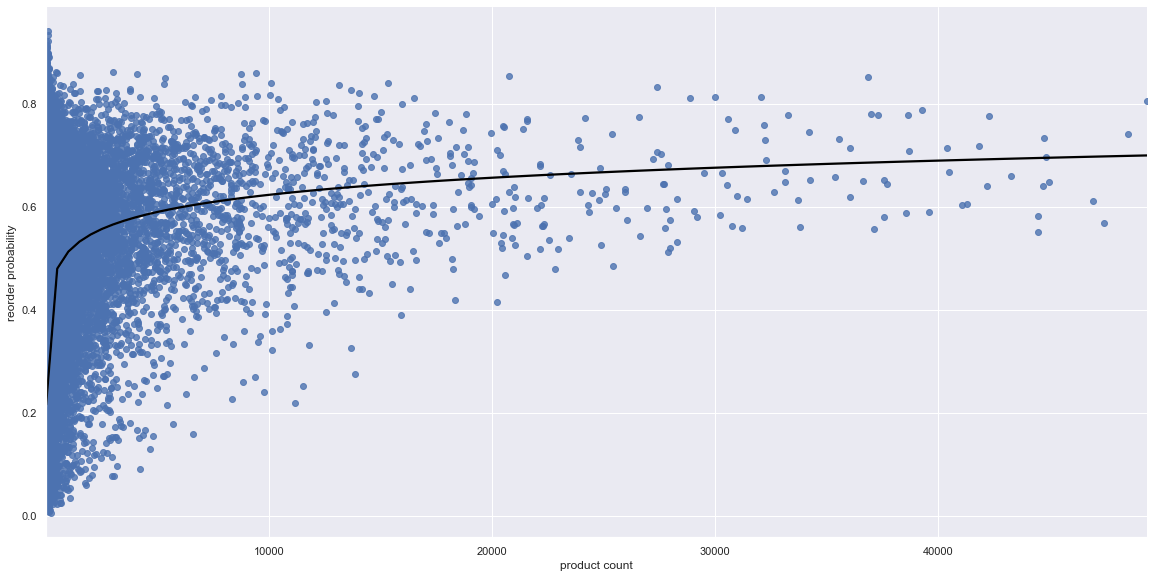

In [232]:
ax = sns.lmplot(x='order_id',y='probability',data=res_df2[res_df2.order_id < 50000],fit_reg=True, logx=True, n_boot=1, line_kws={'color': 'black'}, height=8, aspect=2) 
ax.set(xlabel='product count', ylabel='reorder probability')


In [216]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00


In [111]:
organic = order_products_join

In [112]:
organic['product_name'] = organic['product_name'].str.lower()
organic

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,organic egg whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,michigan organic kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,garlic powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,coconut butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,natural sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,natural artesian water,115,7,water seltzer sparkling water,beverages,169679,train,30,0,10,4.00
33819102,3421063,35548,4,1,twice baked potatoes,13,20,prepared meals,deli,169679,train,30,0,10,4.00
33819103,3421070,35951,1,1,organic unsweetened almond milk,91,16,soy lactosefree,dairy eggs,139822,train,15,6,10,8.00
33819104,3421070,16953,2,1,creamy peanut butter,88,13,spreads,pantry,139822,train,15,6,10,8.00


In [113]:
len(organic[organic['product_name'].str.contains("organic")])

10656332

In [114]:
len(organic[~organic['product_name'].str.contains("organic")])

23162774

In [115]:
len(organic[organic['product_name'].str.contains("organic")])/len(organic)

0.31509798041379333

In [116]:
len(organic[~organic['product_name'].str.contains("organic")])/len(organic)

0.6849020195862067

In [121]:
len(organic[organic['product_name'].str.contains("organic") & (organic['reordered'] == 1)] )

6770898

In [122]:
len(organic[organic['product_name'].str.contains("organic") & (organic['reordered'] == 1)] )/len(organic)

0.20020925449655588

In [123]:
len(organic[~organic['product_name'].str.contains("organic") & (organic['reordered'] == 1)] )/len(organic)

0.38985246978438753

In [124]:
order_products_join.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,organic egg whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.00
1,2,28985,2,1,michigan organic kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.00
2,2,9327,3,0,garlic powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.00
3,2,45918,4,1,coconut butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.00
4,2,30035,5,0,natural sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.00


In [129]:
order_products_join['order_number'].value_counts()

1      2078068
3      2050731
2      2048332
4      1970180
5      1751959
        ...   
96       14215
97       13691
98       13150
99       12686
100       7624
Name: order_number, Length: 100, dtype: int64

In [133]:
cust = order_products_join[order_products_join['order_number'] > 1].groupby(['user_id', 'order_id'])['reordered'].mean().reset_index().sort_values(by='reordered', ascending = False)
cust.head(20)

,user_id,order_id,reordered
880964,57601,504582,1.00
2732922,179732,2444170,1.00
524650,34414,2648690,1.00
524651,34414,2669232,1.00
524652,34414,2751540,1.00
524653,34414,2783125,1.00
524654,34414,2855955,1.00
524655,34414,2925870,1.00
524656,34414,2938045,1.00
2059412,135133,3280991,1.00


In [136]:
cust1 = cust.groupby(['user_id'])['reordered'].mean().reset_index().sort_values(by='reordered', ascending = False)
cust1.head()

,user_id,reordered
103023,103024,1.00
56453,56454,1.00
88641,88642,1.00
63346,63347,1.00
32128,32129,1.00


In [137]:
cust1.shape

(206209, 2)

In [140]:
cust1[cust1['reordered'].astype(int) == 1]

,user_id,reordered
103023,103024,1.00
56453,56454,1.00
88641,88642,1.00
63346,63347,1.00
32128,32129,1.00
...,...,...
153399,153400,1.00
66118,66119,1.00
23777,23778,1.00
67669,67670,1.00


In [144]:
order_products_join[order_products_join['user_id'] == 99753]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
440298,46614,27845,1,1,organic whole milk,84,16,milk,dairy eggs,99753,prior,45,3,7,2.00
440299,46614,38689,2,1,organic reduced fat milk,84,16,milk,dairy eggs,99753,prior,45,3,7,2.00
635564,67223,27845,1,1,organic whole milk,84,16,milk,dairy eggs,99753,prior,65,4,12,2.00
635565,67223,38689,2,1,organic reduced fat milk,84,16,milk,dairy eggs,99753,prior,65,4,12,2.00
1974957,208307,27845,1,1,organic whole milk,84,16,milk,dairy eggs,99753,prior,2,4,8,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675970,3340933,38689,2,1,organic reduced fat milk,84,16,milk,dairy eggs,99753,prior,55,5,7,2.00
31849418,3359243,27845,1,1,organic whole milk,84,16,milk,dairy eggs,99753,prior,10,1,10,4.00
31849419,3359243,38689,2,1,organic reduced fat milk,84,16,milk,dairy eggs,99753,prior,10,1,10,4.00
33706902,3143182,27845,1,1,organic whole milk,84,16,milk,dairy eggs,99753,train,100,1,8,5.00


In [143]:
order_products_join[order_products_join['user_id'] == 99753]['order_id'].value_counts()

349436     2
1293833    2
1979217    2
3309651    2
2646617    2
          ..
445207     1
2850581    1
1917685    1
2589902    1
2846923    1
Name: order_id, Length: 100, dtype: int64